In [1]:
%matplotlib inline
#%matplotlib nbagg
# %matplotlib notebook
import numpy as np
import pandas as pd
import sys
from io import StringIO
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import matplotlib.animation as animation
import time
from IPython import display
from sklearn.linear_model import SGDClassifier

In [2]:
## Reading from toy dataset
boston = datasets.load_boston()
X = boston.data
y = boston.target
m = X.shape[0]
df = pd.DataFrame(X)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [3]:
#Choosing best features
X_new = boston.data[:,7:8]
X_new.shape
y = np.reshape(y,(506,1))

## Preprocessing of data 

In [4]:
X_new = preprocessing.scale(X_new)
X_b = np.concatenate((np.ones((m,1)),X_new),axis = 1)

In [5]:
y.shape

(506, 1)

In [6]:
X_b.shape

(506, 2)

#### Function for gradient descent

In [7]:
def  gradient_descent (X,y,theta,learning_rate=0.01,iterations=100):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations,1+1))
    for it in range(iterations):
        
        prediction = np.dot(X,theta)
        
        theta = theta -(1/m)*learning_rate*( X.T.dot((prediction - y)))
        theta_history[it,:] =theta.T
        cost_history[it]  = cal_cost(theta,X,y)
        
    return theta, cost_history, theta_history

#### Loss function

In [8]:
def  cal_cost(theta,X,y):
    
    m = len(y)
    
    predictions = X.dot(theta)
    cost = (1/2*m) * np.sum(np.square(predictions-y))
    return cost

#### Visualization

In [9]:
def plot_graph(slope,c):
   
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    
    ax.scatter(X_new, y)

    x_min, x_max = ax.get_xlim()
    y_min, y_max = c, c + slope*(x_max-x_min)
    ax.plot([x_min, x_max], [y_min, y_max], color = 'r')
    ax.set_xlim([x_min, x_max])

In [10]:
lr =0.01
n_iter = 1000

theta = np.random.randn(2,1)
theta,cost_history,theta_history = gradient_descent(X_b,y,theta,lr,n_iter)
print('Theta0:          {},\nTheta1:          {}'.format(theta[0][0],theta[1][0]))

print('Final cost/MSE:  {}'.format(cost_history[-1]))

Theta0:          22.531846353829902,
Theta1:          2.2961672370290427
Final cost/MSE:  10132156.47932712


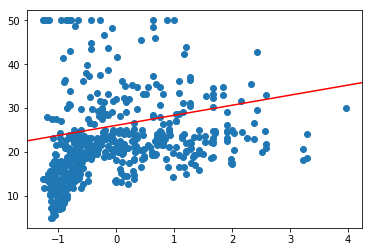

In [11]:
intercept,coeff = theta[0][0],theta[1][0]
plot_graph(coeff,intercept)

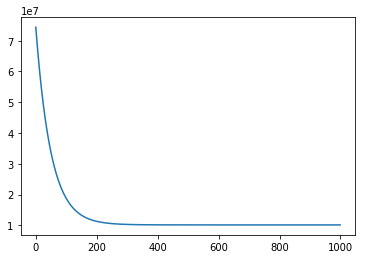

In [12]:
plt.plot(cost_history)

** loss continue to decrease upto 200 iteration**